In [1]:
import pickle
import yaml
from pprint import pprint

% matplotlib inline
import matplotlib.pyplot as plt


In [2]:
plots_b32 = yaml.load(open('dump/n_time_b32_topk1.yaml', 'rt'))["plots"]
plots_b64 = yaml.load(open('dump/n_time_b64_topk1.yaml', 'rt'))["plots"]
pprint(plots_b32)
pprint(plots_b64)

{'T1': {'x': [1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000],
        'y': [481.631,
              16.8715,
              0.8856229999999999,
              0.122003,
              0.0649425,
              0.0644213,
              0.058714800000000004]},
 'T2': {'x': [100, 1000, 10000, 100000, 1000000, 10000000, 100000000],
        'y': [1.64263,
              0.353823,
              0.146707,
              0.117362,
              0.164223,
              0.677321,
              5.00478]},
 'T4': {'x': [100, 1000, 10000, 100000, 1000000, 10000000],
        'y': [0.131616, 0.124865, 0.188138, 0.69619, 4.64845, 38.2836]},
 'adc': {'x': [100,
               1000,
               10000,
               100000,
               1000000,
               10000000,
               100000000,
               1000000000],
         'y': [0.0222607,
               0.0346283,
               0.0759191,
               0.693276,
               5.95028,
               60.2636,
               589

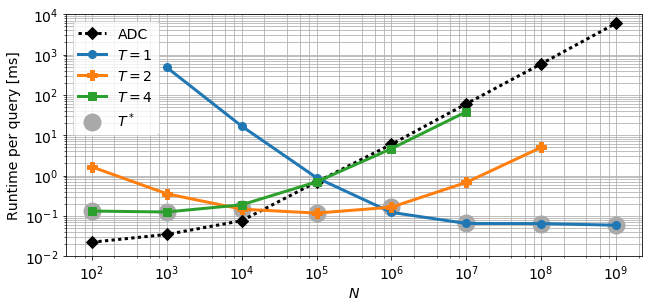

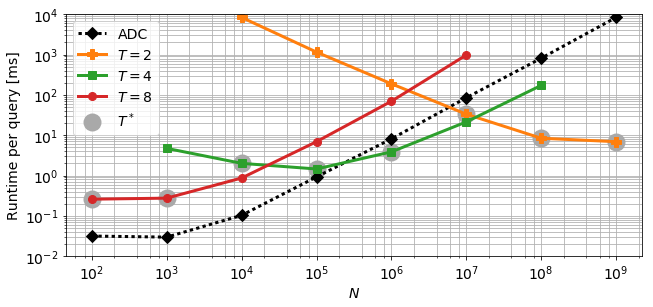

In [5]:
for B in ["32", "64"]:
    if B == "32":
        plots = plots_b32
    elif B == "64":
        plots = plots_b64
            
    
    # Params
    fontsize = 14
    linewidth = 3
    markersize = 8

    plt.figure(figsize=[9, 4])

    # Plot
    if B == "32":
        # Put shade on plots when table is used
        plt.plot(plots['adc']['x'], [plots['T4']['y'][0],
                                     plots['T4']['y'][1],
                                     plots['T2']['y'][2],
                                     plots['T2']['y'][3],
                                     plots['T2']['y'][4],
                                     plots['T1']['y'][4],
                                     plots['T1']['y'][5],
                                     plots['T1']['y'][6]],
                        "o", mec='none', ms=markersize+10, color="darkgray", label="$T^*$")

        plt.plot(plots['adc']['x'], plots['adc']['y'], "D:", lw=linewidth, ms=markersize, label='ADC', color='black')
        plt.plot(plots['T1']['x'], plots['T1']['y'], "o-", lw=linewidth, ms=markersize, label='$T=1$', color='C0')
        plt.plot(plots['T2']['x'], plots['T2']['y'], "P-", lw=linewidth, ms=markersize+2, label='$T=2$', color='C1')
        plt.plot(plots['T4']['x'], plots['T4']['y'], "s-", lw=linewidth, ms=markersize, label='$T=4$', color='C2')
        
    elif B == "64":
        # Put shade on plots when table is used
        plt.plot(plots['adc']['x'], [plots['T8']['y'][0],
                                     plots['T8']['y'][1],
                                     plots['T4']['y'][1],
                                     plots['T4']['y'][2],
                                     plots['T4']['y'][3],
                                     plots['T2']['y'][3],
                                     plots['T2']['y'][4],
                                     plots['T2']['y'][5]],
                        "o", mec='none', ms=markersize+10, color="darkgray", label="$T^*$")
        
        plt.plot(plots['adc']['x'], plots['adc']['y'], "D:", lw=linewidth, ms=markersize, label='ADC', color='black')
        plt.plot(plots['T2']['x'], plots['T2']['y'], "P-", lw=linewidth, ms=markersize+2, label='$T=2$', color='C1')
        plt.plot(plots['T4']['x'], plots['T4']['y'], "s-", lw=linewidth, ms=markersize, label='$T=4$', color='C2')
        plt.plot(plots['T8']['x'], plots['T8']['y'], "o-", lw=linewidth, ms=markersize, label='$T=8$', color='C3')

    # Texts
    plt.xlabel('$N$', fontsize=fontsize)
    plt.ylabel('Runtime per query [ms]', fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)

    # Legend
    # handlelength: if 0, delete line in legend.
    # To re-order items in legend, set landles and labels
    handles,labels = plt.axes().get_legend_handles_labels()
    handles = [handles[1], handles[2], handles[3], handles[4], handles[0]]
    labels = [labels[1], labels[2], labels[3], labels[4], labels[0]]
    plt.legend(handles, labels, fontsize=fontsize, handlelength=2, loc='upper left')

    # Grid
    # which='both': show more grids (useful for log scaling)
    plt.grid(True, which='both')#, color='darkgray')

    # Log
    plt.xscale('log')
    plt.yscale('log')

    # Ranges
    plt.ylim([0.01, 10**4])

    # Write
    # Adjust white spaces when the text size is big. This is manually adjusted
    # http://d.hatena.ne.jp/nohzen/20130922/1379807776
    plt.subplots_adjust(left=0.1, bottom=0.13, right=0.99, top=0.97, wspace=None, hspace=None)

    if B == "32":
        plt.savefig("anal1.pdf")
    elif B == "64":
        plt.savefig("anal2.pdf")
